# Gathering Recent SARS-CoV-2 data

#### From the [GISAID database](https://www.gisaid.org/),I downloaded the ten most recent lab submissions of COVID-19 sequences in the US and the ten most recent lab submissions of COVID-19 sequences from China. The US samples were collected in March, while the most recent China samples were collected in February.

#### FASTA files are stored in [my github repo](https://github.com/sarahkurd/bioinformatics-sample-code) under /data/US and /data/China.

#### **Question:** I want to know how the phylogenic trees compare for these two countries, in hopes of being able to see which country has a more evolved sequence when aligned with a reference sequence

# Install [Virulign](https://github.com/rega-cev/virulign)
### A tool for codon-correct pairwise alignment and annotation of viral genomes
#### I installed my pacakge inside the folder below

In [1]:
!/usr/local/bin/virulign

Usage: virulign [reference.fasta orf-description.xml] sequences.fasta
Optional parameters (first option will be the default):
  --exportKind [Mutations PairwiseAlignments GlobalAlignment PositionTable MutationTable]
  --exportAlphabet [AminoAcids Nucleotides]
  --exportWithInsertions [yes no]
  --exportReferenceSequence [no yes]
  --gapExtensionPenalty doubleValue=>3.3
  --gapOpenPenalty doubleValue=>10.0
  --maxFrameShifts intValue=>3
  --progress [no yes]
  --nt-debug directory
Output: The alignment will be printed to standard out and any progress or error messages will be printed to the standard error. This output can be redirected to files, e.g.:
   virulign ref.xml sequence.fasta > alignment.mutations 2> alignment.err


### Since each sequence was downloaded individually is in its own file, I first had to combine all the FASTA files into one file by appending them.

In [35]:
import os

path = "./data/US/"
appended_data = ""
for f in os.listdir("./data/US"):
    f_o = open(path+f, 'r')
    data = f_o.read()
    appended_data += data
    appended_data += "\n"
with open(path+'all_US_data.fasta', 'w') as fp:
    fp.write(appended_data)

EPI_ISL_421550.fasta
EPI_ISL_421549.fasta
EPI_ISL_421552.fasta
EPI_ISL_426325.fasta
EPI_ISL_421553.fasta
EPI_ISL_421551.fasta
EPI_ISL_421548.fasta
EPI_ISL_421544.fasta
EPI_ISL_421547.fasta
EPI_ISL_421545.fasta


In [29]:
path = "./data/China/"
appended_data = ""
for f in os.listdir("./data/China"):
    f_o = open(path+f, 'r')
    data = f_o.read()
    appended_data += data
    appended_data += "\n"
with open(path+'all_China_data.fasta', 'w') as fp:
    fp.write(appended_data)

# Using [Virulign](https://github.com/rega-cev/virulign-tutorial)
### The virulign command below uses the SARS-CoV-2 sequence as a reference sequence and the fasta file for China and the US as our target sequence. The command works by aligning each codon in the target sequence correctly against the reference sequence. Our output format is a position table.

In [36]:
!/usr/local/bin/virulign ../virulign/references/SARS-CoV-2/S.xml ./data/US/all_US_data.fasta --exportAlphabet Nucleotides --exportKind PositionTable > US_position_table.csv

Align target 0 (hCoV-19/USA/WY-WYPHL014/2020|EPI_ISL_421550)
Align target 1 (hCoV-19/USA/WY-WYPHL012/2020|EPI_ISL_421549)
Align target 2 (hCoV-19/USA/WY-WYPHL018/2020|EPI_ISL_421552)
Align target 3 (hCoV-19/USA/NY-Wadsworth-11191-01/2020|EPI_ISL_426325)
Align target 4 (hCoV-19/USA/WY-WYPHL019/2020|EPI_ISL_421553)
Align target 5 (hCoV-19/USA/WY-WYPHL015/2020|EPI_ISL_421551)
Align target 6 (hCoV-19/USA/WY-WYPHL011/2020|EPI_ISL_421548)
Align target 7 (hCoV-19/USA/WY-WYPHL007/2020|EPI_ISL_421544)
Align target 8 (hCoV-19/USA/WY-WYPHL010/2020|EPI_ISL_421547)
Align target 9 (hCoV-19/USA/WY-WYPHL008/2020|EPI_ISL_421545)
Computing global alignment... done.


In [18]:
!/usr/local/bin/virulign ../virulign/references/SARS-CoV-2/S.xml ./data/China/all_China_data.fasta --exportAlphabet Nucleotides --exportKind PositionTable > China_position_table.csv

Align target 0 (hCoV-19/Shanghai/SH0028/2020|EPI_ISL_416337)
Align target 1 (hCoV-19/Shanghai/SH0026/2020|EPI_ISL_416335)
Align target 2 (hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334)
Align target 3 (hCoV-19/Shanghai/SH0027/2020|EPI_ISL_416336)
Align target 4 (hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330)
Align target 5 (hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342)
Align target 6 (hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340)
Align target 7 (hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338)
Align target 8 (hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339)
Align target 9 (hCoV-19/Shanghai/SH0032/2020|EPI_ISL_416341)
Computing global alignment... done.


In [81]:
import pandas as pd
US_position_table = pd.read_csv('US_position_table.csv')
China_position_table = pd.read_csv('China_position_table.csv')

In [82]:
US_position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,hCoV-19/USA/WY-WYPHL014/2020|EPI_ISL_421550,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,hCoV-19/USA/WY-WYPHL012/2020|EPI_ISL_421549,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,hCoV-19/USA/WY-WYPHL018/2020|EPI_ISL_421552,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,hCoV-19/USA/NY-Wadsworth-11191-01/2020|EPI_ISL...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,hCoV-19/USA/WY-WYPHL019/2020|EPI_ISL_421553,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
5,hCoV-19/USA/WY-WYPHL015/2020|EPI_ISL_421551,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
6,hCoV-19/USA/WY-WYPHL011/2020|EPI_ISL_421548,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
7,hCoV-19/USA/WY-WYPHL007/2020|EPI_ISL_421544,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
8,hCoV-19/USA/WY-WYPHL010/2020|EPI_ISL_421547,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
9,hCoV-19/USA/WY-WYPHL008/2020|EPI_ISL_421545,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


In [83]:
China_position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,hCoV-19/Shanghai/SH0028/2020|EPI_ISL_416337,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,hCoV-19/Shanghai/SH0026/2020|EPI_ISL_416335,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,hCoV-19/Shanghai/SH0027/2020|EPI_ISL_416336,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
5,hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
6,hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
7,hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
8,hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
9,hCoV-19/Shanghai/SH0032/2020|EPI_ISL_416341,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


In [84]:
vertical_stack = pd.concat([China_position_table, US_position_table], axis=0)
vertical_stack

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,hCoV-19/Shanghai/SH0028/2020|EPI_ISL_416337,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,hCoV-19/Shanghai/SH0026/2020|EPI_ISL_416335,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,hCoV-19/Shanghai/SH0027/2020|EPI_ISL_416336,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
5,hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
6,hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
7,hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
8,hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
9,hCoV-19/Shanghai/SH0032/2020|EPI_ISL_416341,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


In [85]:
vertical_concensus_seq = vertical_stack.drop('seqid',axis=1).mode(axis=0).T[0]
vertical_concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [86]:
US_concensus_seq = US_position_table.drop('seqid',axis=1).mode(axis=0).T[0]
US_concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [87]:
China_concensus_seq = China_position_table.drop('seqid',axis=1).mode(axis=0).T[0]
China_concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [88]:
US_position_table = US_position_table.set_index('seqid')
China_position_table = China_position_table.set_index('seqid')
vertical_position_table = vertical_stack.set_index('seqid')

In [89]:
US_position_table

,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,S_4_1,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
seqid,,,,,,,,,,,,,,,,,,,,,
hCoV-19/USA/WY-WYPHL014/2020|EPI_ISL_421550,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/WY-WYPHL012/2020|EPI_ISL_421549,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/WY-WYPHL018/2020|EPI_ISL_421552,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/NY-Wadsworth-11191-01/2020|EPI_ISL_426325,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/WY-WYPHL019/2020|EPI_ISL_421553,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/WY-WYPHL015/2020|EPI_ISL_421551,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/WY-WYPHL011/2020|EPI_ISL_421548,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/WY-WYPHL007/2020|EPI_ISL_421544,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/USA/WY-WYPHL010/2020|EPI_ISL_421547,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A


In [90]:
China_position_table

,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,S_4_1,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
seqid,,,,,,,,,,,,,,,,,,,,,
hCoV-19/Shanghai/SH0028/2020|EPI_ISL_416337,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0026/2020|EPI_ISL_416335,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0027/2020|EPI_ISL_416336,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A


In [99]:
vertical_position_table

,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,S_4_1,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
seqid,,,,,,,,,,,,,,,,,,,,,
hCoV-19/Shanghai/SH0028/2020|EPI_ISL_416337,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0026/2020|EPI_ISL_416335,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0027/2020|EPI_ISL_416336,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A
hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339,A,T,G,T,T,T,G,T,T,T,...,A,C,A,T,T,A,C,A,C,A


In [94]:
US_distance_from_concensus_seq = US_position_table.apply(lambda row: sum(row != US_concensus_seq),axis=1)
US_distance_from_concensus_seq_sorted = US_distance_from_concensus_seq.sort_values(ascending=False)
US_distance_from_concensus_seq_sorted

China_distance_from_concensus_seq = China_position_table.apply(lambda row: sum(row != China_concensus_seq),axis=1)
China_distance_from_concensus_seq_sorted = China_distance_from_concensus_seq.sort_values(ascending=False)
China_distance_from_concensus_seq_sorted

vertical_distance_from_concensus_seq = vertical_position_table.apply(lambda row: sum(row != vertical_concensus_seq),axis=1)
vertical_distance_from_concensus_seq_sorted = vertical_distance_from_concensus_seq.sort_values(ascending=False)
vertical_distance_from_concensus_seq_sorted

seqid
hCoV-19/USA/WY-WYPHL008/2020|EPI_ISL_421545              1
hCoV-19/USA/WY-WYPHL018/2020|EPI_ISL_421552              1
hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334              1
hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338              1
hCoV-19/USA/WY-WYPHL010/2020|EPI_ISL_421547              1
hCoV-19/USA/WY-WYPHL014/2020|EPI_ISL_421550              1
hCoV-19/Shanghai/SH0032/2020|EPI_ISL_416341              1
hCoV-19/USA/NY-Wadsworth-11191-01/2020|EPI_ISL_426325    1
hCoV-19/USA/WY-WYPHL019/2020|EPI_ISL_421553              1
hCoV-19/USA/WY-WYPHL015/2020|EPI_ISL_421551              1
hCoV-19/USA/WY-WYPHL007/2020|EPI_ISL_421544              1
hCoV-19/USA/WY-WYPHL012/2020|EPI_ISL_421549              0
hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339              0
hCoV-19/USA/WY-WYPHL011/2020|EPI_ISL_421548              0
hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340              0
hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342              0
hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330       

In [100]:
US_subset_seqs = US_distance_from_concensus_seq_sorted.index
China_subset_seqs = China_distance_from_concensus_seq_sorted.index
vertical_subset_seqs = vertical_distance_from_concensus_seq_sorted.index

In [101]:
distances = {}
for i,seqid1 in enumerate(US_subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(US_subset_seqs)):
        seqid2 = US_subset_seqs[j]
        distances[seqid1,seqid2] = sum(US_position_table.loc[seqid1] != US_position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

china_distances = {}
for i,seqid1 in enumerate(China_subset_seqs):
    china_distances[seqid1,seqid1]=0
    for j in range(i+1,len(China_subset_seqs)):
        seqid2 = China_subset_seqs[j]
        china_distances[seqid1,seqid2] = sum(China_position_table.loc[seqid1] != China_position_table.loc[seqid2])
        china_distances[seqid2,seqid1] = china_distances[seqid1,seqid2]
china_distances = pd.Series(china_distances).unstack()
china_distances

china_vs_US_distances = {}
for i,seqid1 in enumerate(vertical_subset_seqs):
    china_vs_US_distances[seqid1,seqid1]=0
    for j in range(i+1,len(vertical_subset_seqs)):
        seqid2 = vertical_subset_seqs[j]
        china_vs_US_distances[seqid1,seqid2] = sum(vertical_position_table.loc[seqid1] != vertical_position_table.loc[seqid2])
        china_vs_US_distances[seqid2,seqid1] = china_vs_US_distances[seqid1,seqid2]
china_vs_US_distances = pd.Series(china_vs_US_distances).unstack()
china_vs_US_distances

,hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330,hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334,hCoV-19/Shanghai/SH0026/2020|EPI_ISL_416335,hCoV-19/Shanghai/SH0027/2020|EPI_ISL_416336,hCoV-19/Shanghai/SH0028/2020|EPI_ISL_416337,hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338,hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339,hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340,hCoV-19/Shanghai/SH0032/2020|EPI_ISL_416341,hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342,hCoV-19/USA/NY-Wadsworth-11191-01/2020|EPI_ISL_426325,hCoV-19/USA/WY-WYPHL007/2020|EPI_ISL_421544,hCoV-19/USA/WY-WYPHL008/2020|EPI_ISL_421545,hCoV-19/USA/WY-WYPHL010/2020|EPI_ISL_421547,hCoV-19/USA/WY-WYPHL011/2020|EPI_ISL_421548,hCoV-19/USA/WY-WYPHL012/2020|EPI_ISL_421549,hCoV-19/USA/WY-WYPHL014/2020|EPI_ISL_421550,hCoV-19/USA/WY-WYPHL015/2020|EPI_ISL_421551,hCoV-19/USA/WY-WYPHL018/2020|EPI_ISL_421552,hCoV-19/USA/WY-WYPHL019/2020|EPI_ISL_421553
hCoV-19/Shanghai/SH0021/2020|EPI_ISL_416330,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
hCoV-19/Shanghai/SH0025/2020|EPI_ISL_416334,1,0,1,1,1,2,1,1,2,1,0,0,0,0,1,1,0,0,2,0
hCoV-19/Shanghai/SH0026/2020|EPI_ISL_416335,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
hCoV-19/Shanghai/SH0027/2020|EPI_ISL_416336,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
hCoV-19/Shanghai/SH0028/2020|EPI_ISL_416337,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
hCoV-19/Shanghai/SH0029/2020|EPI_ISL_416338,1,2,1,1,1,0,1,1,0,1,2,2,2,2,1,1,2,2,2,2
hCoV-19/Shanghai/SH0030/2020|EPI_ISL_416339,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
hCoV-19/Shanghai/SH0031/2020|EPI_ISL_416340,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
hCoV-19/Shanghai/SH0032/2020|EPI_ISL_416341,1,2,1,1,1,0,1,1,0,1,2,2,2,2,1,1,2,2,2,2
hCoV-19/Shanghai/SH0033/2020|EPI_ISL_416342,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1


In [103]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
import numpy as np 
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

matrix = np.tril(china_distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm_china = DistanceMatrix(list(china_distances.index), matrix)

matrix = np.tril(china_vs_US_distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm_US_vs_China = DistanceMatrix(list(china_vs_US_distances.index), matrix)

In [104]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
constructor2 = DistanceTreeConstructor()
constructor3 = DistanceTreeConstructor()
tree = constructor.nj(dm)
china_tree = constructor2.nj(dm_china)
china_vs_US_tree = constructor3.nj(dm_US_vs_China)

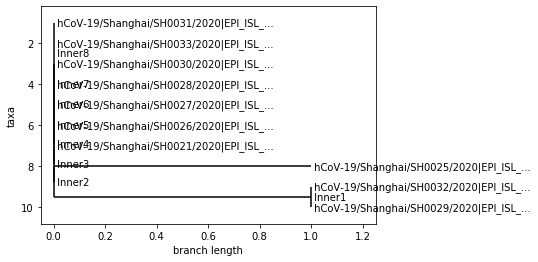

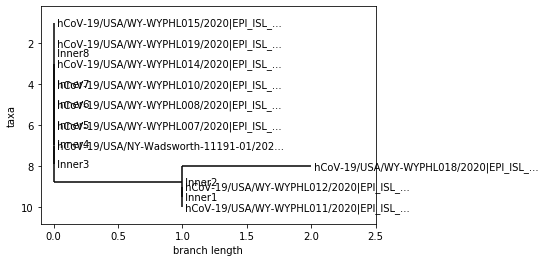

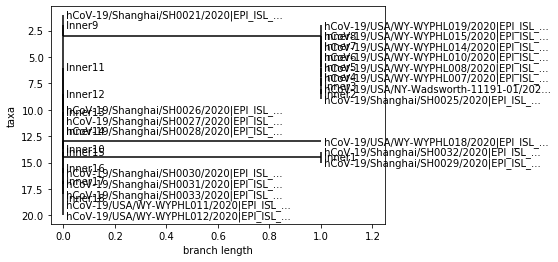

In [105]:
%matplotlib inline

from Bio import Phylo
tree.ladderize()   # Flip branches so deeper clades are displayed at top
china_tree.ladderize()
Phylo.draw(china_tree)
Phylo.draw(tree)
Phylo.draw(china_vs_US_tree)

# ----- China Tree on top -----
# ----- US Tree in Middle -----
# ----- China vs. US Tree on bottom -----